<a href="https://colab.research.google.com/github/askot19/Analise_de_dados/blob/main/Projetos%20de%20Ci%C3%AAncia%20de%20Dados%20com%20Python/Cap%C3%ADtulo%202/ex08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## **Data Scientist & Analyst**

*by [Paulo Henrique de Melo Ferreira](https://www.linkedin.com/in/paulo-henrique-ferreira-20151374/)*

---

<p style="text-align: justify;">

Este notebook visa aprofundar meus conhecimentos práticos em Ciência de Dados. Meu objetivo aqui é implementar o que já conheço da linguagem Python e desenvolver projetos completos acerca da área. Como bibliografia básica utlizarei o **Projetos de Ciência de Dados com Python - Stephen Klosterman**, que visa tratar dados desde o tipo de a análise mais simples (exploratória de dados) até aplicações envolvendo modelos preditivos e Machine Learning. As ferramentas que utilizarei serão principalmente o **Colaboratory do Google** e o **Jupyter Notebook - Anaconda**. O intuito aqui é consumir toda a literatura e me inserir do dia-a-dia de um profissional de dados, atuando tanto como Cientista quanto como Analista de Dados. Pretendo me tornar um profissional mais qualificado após estes desenvolvimentos.
</p>

---

# 2. Introduction to a Scikit-Learn and Model Evaluation
#### Objetivos

Neste segundo capítulo serão tratados os primeiros passos com Machine Learning e Validação de Modelos. O intuito é ter o primeiro contato com os modelos preditivos mais simples e caminhar para o seu entendimento com uma aplicação prática. Esse trabalho será desenvolvido na plataforma Colaboratory do Google.

In [183]:
# Carregando pacotes necessários para a análise de dados
import pandas as pd #Manipulação de dados
import numpy as np #Computação numérica
import matplotlib.pyplot as plt #Pacote de gráficos
#Renderização de gráficos
%matplotlib inline
import matplotlib as mpl #Adiciona funcionalidades gráficas
mpl.rcParams['figure.dpi'] = 400 #Alta resolução

# Exercise 2.01: LINEAR REGRESSION IN SCIKIT-LEARN

In [184]:
df = pd.read_csv('https://github.com/askot19/Analise_de_dados/raw/main/Projetos%20de%20Ci%C3%AAncia%20de%20Dados%20com%20Python/Cap%C3%ADtulo%201/Chapter_1_cleaned_data.csv')

In [185]:
df['default payment next month'].mean()

0.2217971797179718

In [186]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
my_lr = LogisticRegression()

In [189]:
my_lr

LogisticRegression()

In [190]:
my_new_lr = LogisticRegression(penalty='l2', dual=False,\
tol=0.0001, C=1.0,\
fit_intercept=True,\
intercept_scaling=1,\
class_weight=None,\
random_state=None,\
solver='lbfgs',\
max_iter=100,\
multi_class='auto',\
verbose=0, warm_start=False,\
n_jobs=None, l1_ratio=None)

In [191]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [192]:
x = df['EDUCATION'][0:10].values.reshape(-1,1)
x

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [193]:
y =  df[f'default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [194]:
my_new_lr.fit(x,y)

LogisticRegression(C=0.1, solver='liblinear')

In [195]:
new_x = df['EDUCATION'][10:20].values.reshape(-1,1)
new_x

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [196]:
my_new_lr.predict(new_x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [197]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [198]:
from numpy.random import default_rng
rg = default_rng(12345)
X = rg.uniform(low=0.0, high = 10.0, size =(1000,))
X[0:10]

array([2.27336022, 3.1675834 , 7.97365457, 6.76254671, 3.91109551,
       3.32813928, 5.98308754, 1.86734186, 6.72756044, 9.41802865])

In [199]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope*X+np.random.normal(loc=0.0, scale=1.0, size =(1000,))+intercept

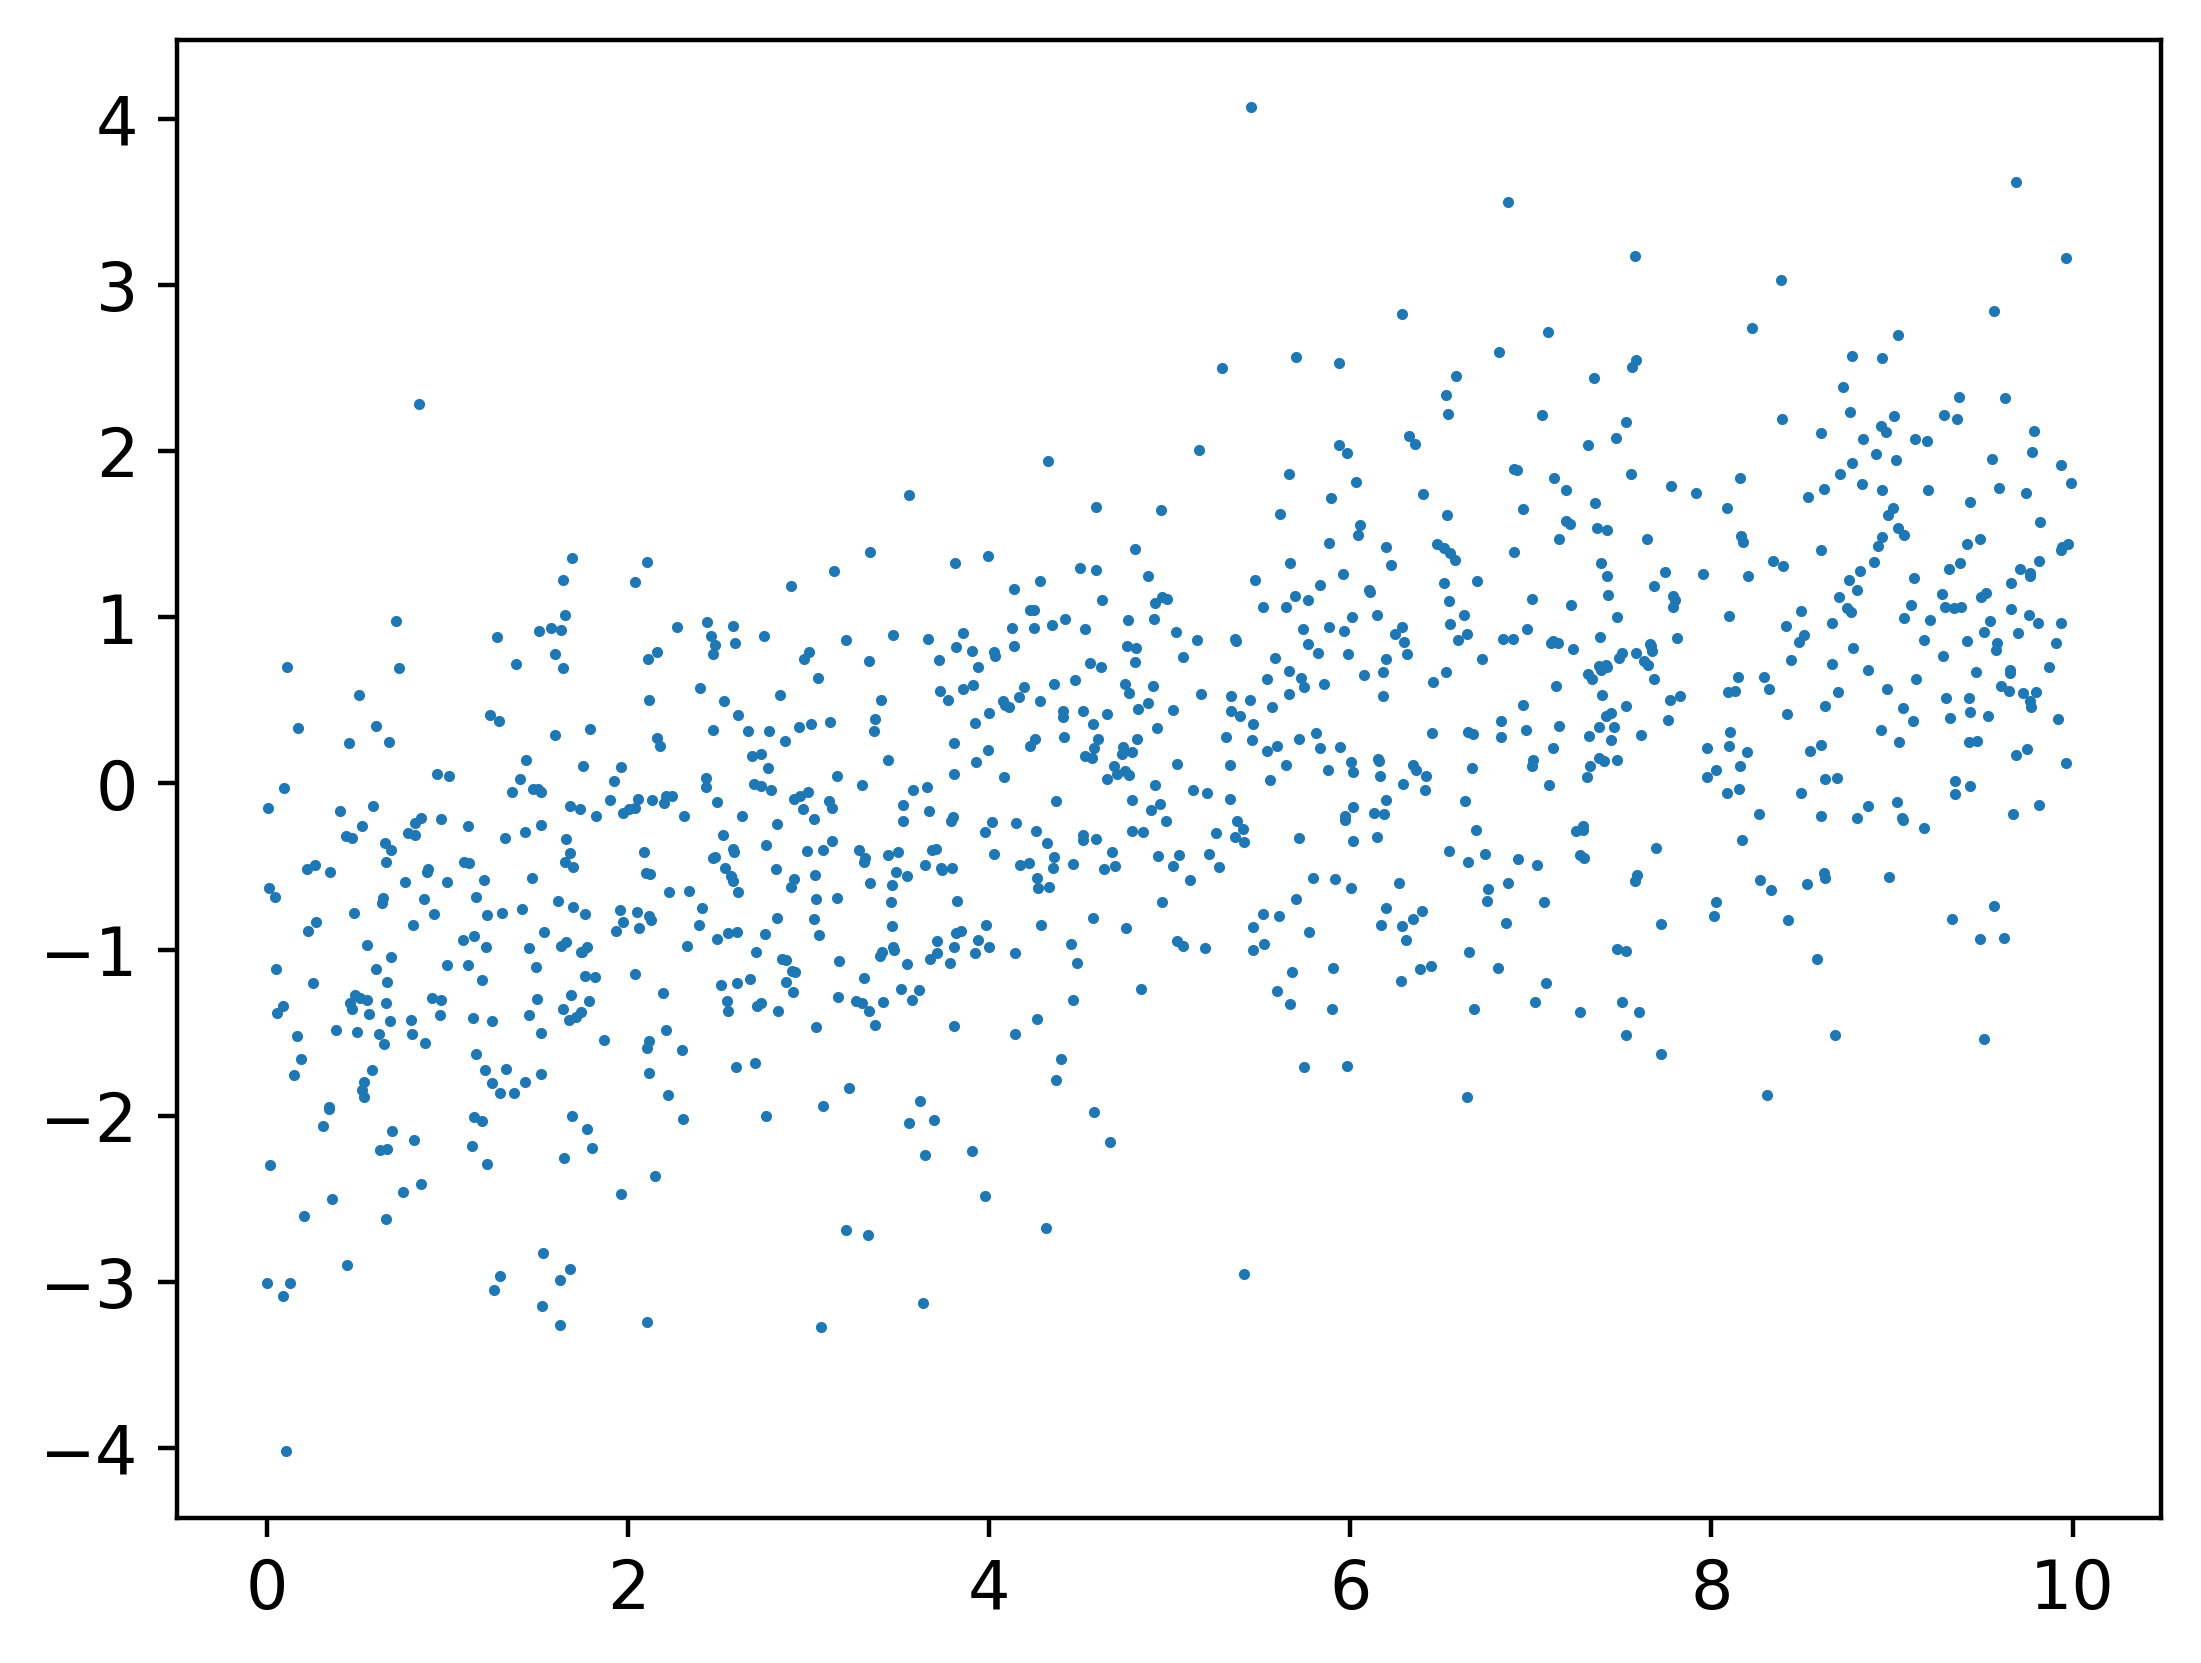

In [200]:
mpl.rcParams['figure.dpi']=400
plt.scatter(X, y, s=1)

In [201]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [202]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.1489527222709361
[0.23734457]


In [203]:
y_pred = lin_reg.predict(X.reshape(-1,1))

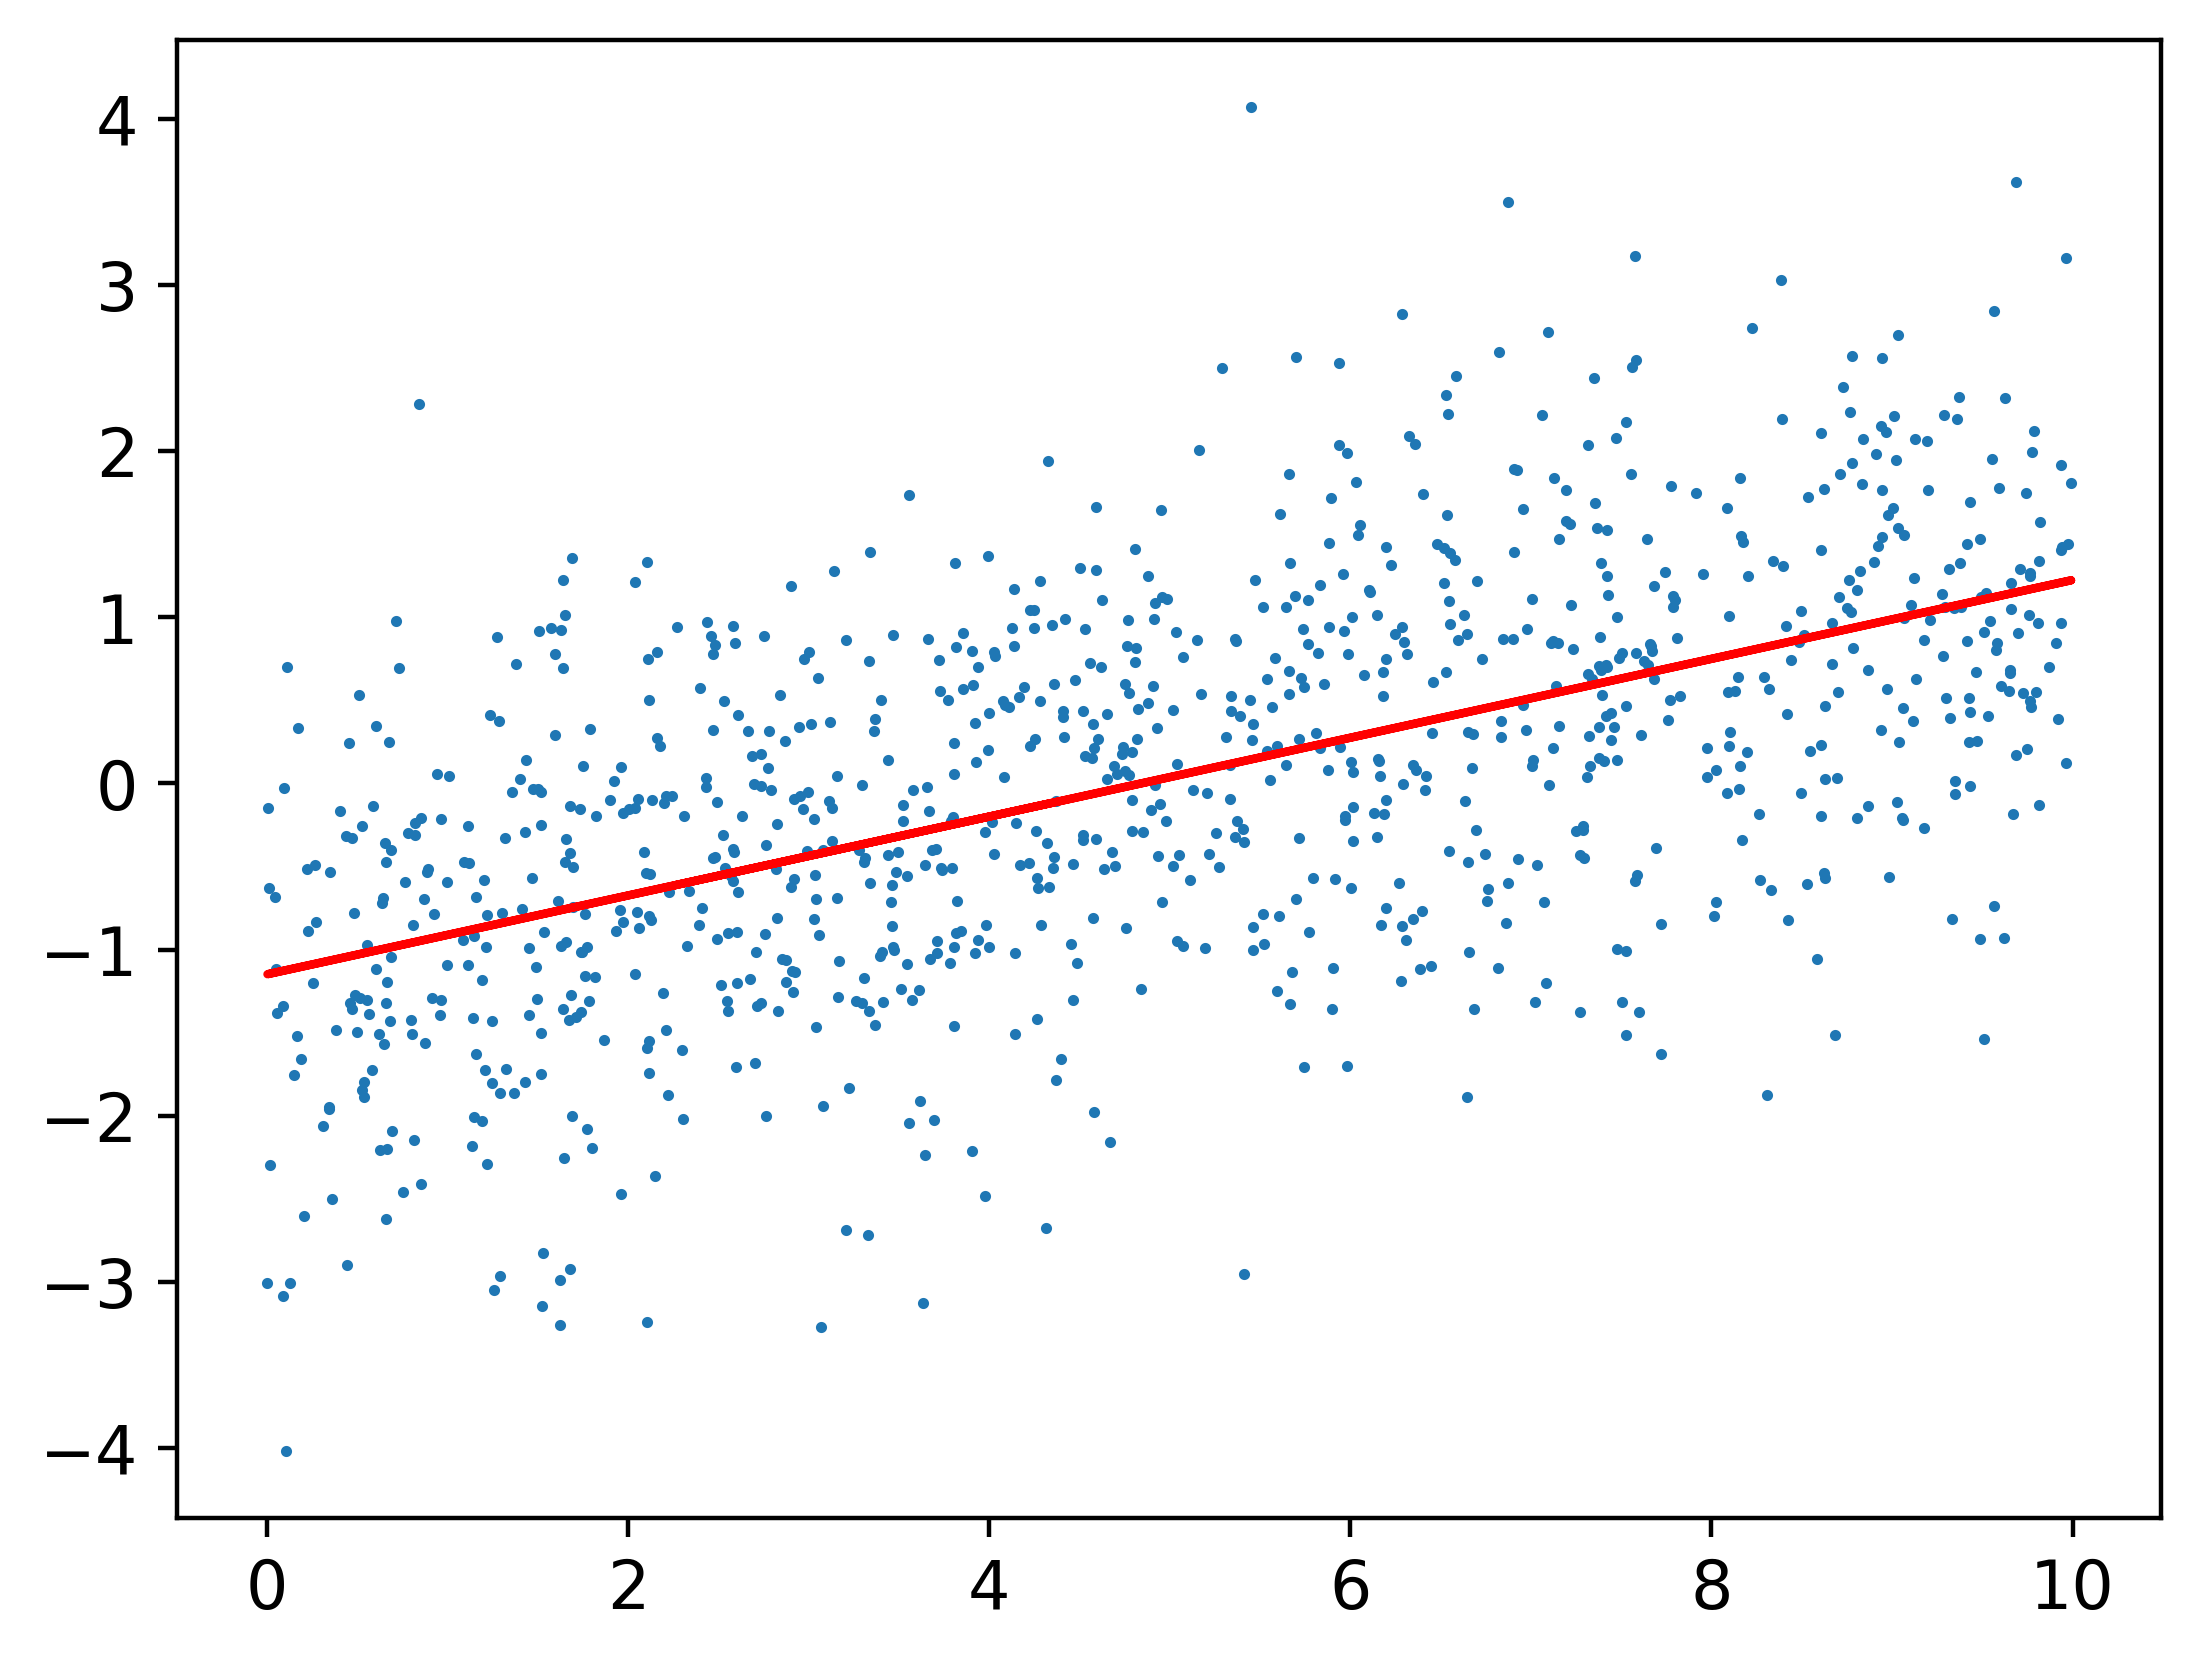

In [204]:
plt.scatter(X, y, s=1)
plt.plot(X, y_pred, 'r')

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24)

In [206]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [207]:
np.mean(y_train)

0.223102526838873

In [208]:
np.mean(y_test)

0.21657603600225014

In [209]:
from sklearn.linear_model import LogisticRegression

In [210]:
example_lr = LogisticRegression(C=0.1, class_weight = None, dual = False, fit_intercept=True, intercept_scaling=1, max_iter= 100, multi_class='auto', n_jobs=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [211]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [212]:
y_pred = example_lr.predict(X_test)

In [213]:
is_correct = y_pred == y_test

In [214]:
np.mean(is_correct)

0.7834239639977498

In [215]:
example_lr.score(X_test, y_test)

0.7834239639977498

In [216]:
from sklearn import metrics

In [217]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

# Exercise 2.02: CALCULATING THE TRUE AND FALSE POSITIVE AND NEGATIVE RATES AND CONFUSION MATRIX IN PYTHON

In [218]:
# Number of positive samples
P = sum(y_test)
P

1155

In [219]:
TP = sum((y_test == 1) & (y_pred == 1))
TP

0

In [220]:
TPR = TP/P
TPR

0.0

In [221]:
FN = sum((y_test == 1) & (y_pred==0))
FN

1155

In [222]:
FNR = FN/P
FNR

1.0

In [223]:
N = sum(y_test==0)
N

4178

In [224]:
TN = sum((y_test==0) & (y_pred==0))
TN

4178

In [225]:
FP = sum((y_test==0) & (y_pred==1))
FP

0

In [226]:
TNR = TN/N
FPR = FP/N

print(f'The true negative rate is {TNR} and the false positive rate is {FPR}')

The true negative rate is 1.0 and the false positive rate is 0.0


In [227]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

# EXERCISE 2.03: OBTAINING PREDICTED PROBABILITIES FROM A TRAINED LOGISTIC REGRESSION MODEL

In [228]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [229]:
prob_sum = np.sum(y_pred_proba, 1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [230]:
prob_sum.shape

(5333,)

In [231]:
np.unique(prob_sum)

array([1.])

In [232]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

Text(0, 0.5, 'Number of samples')

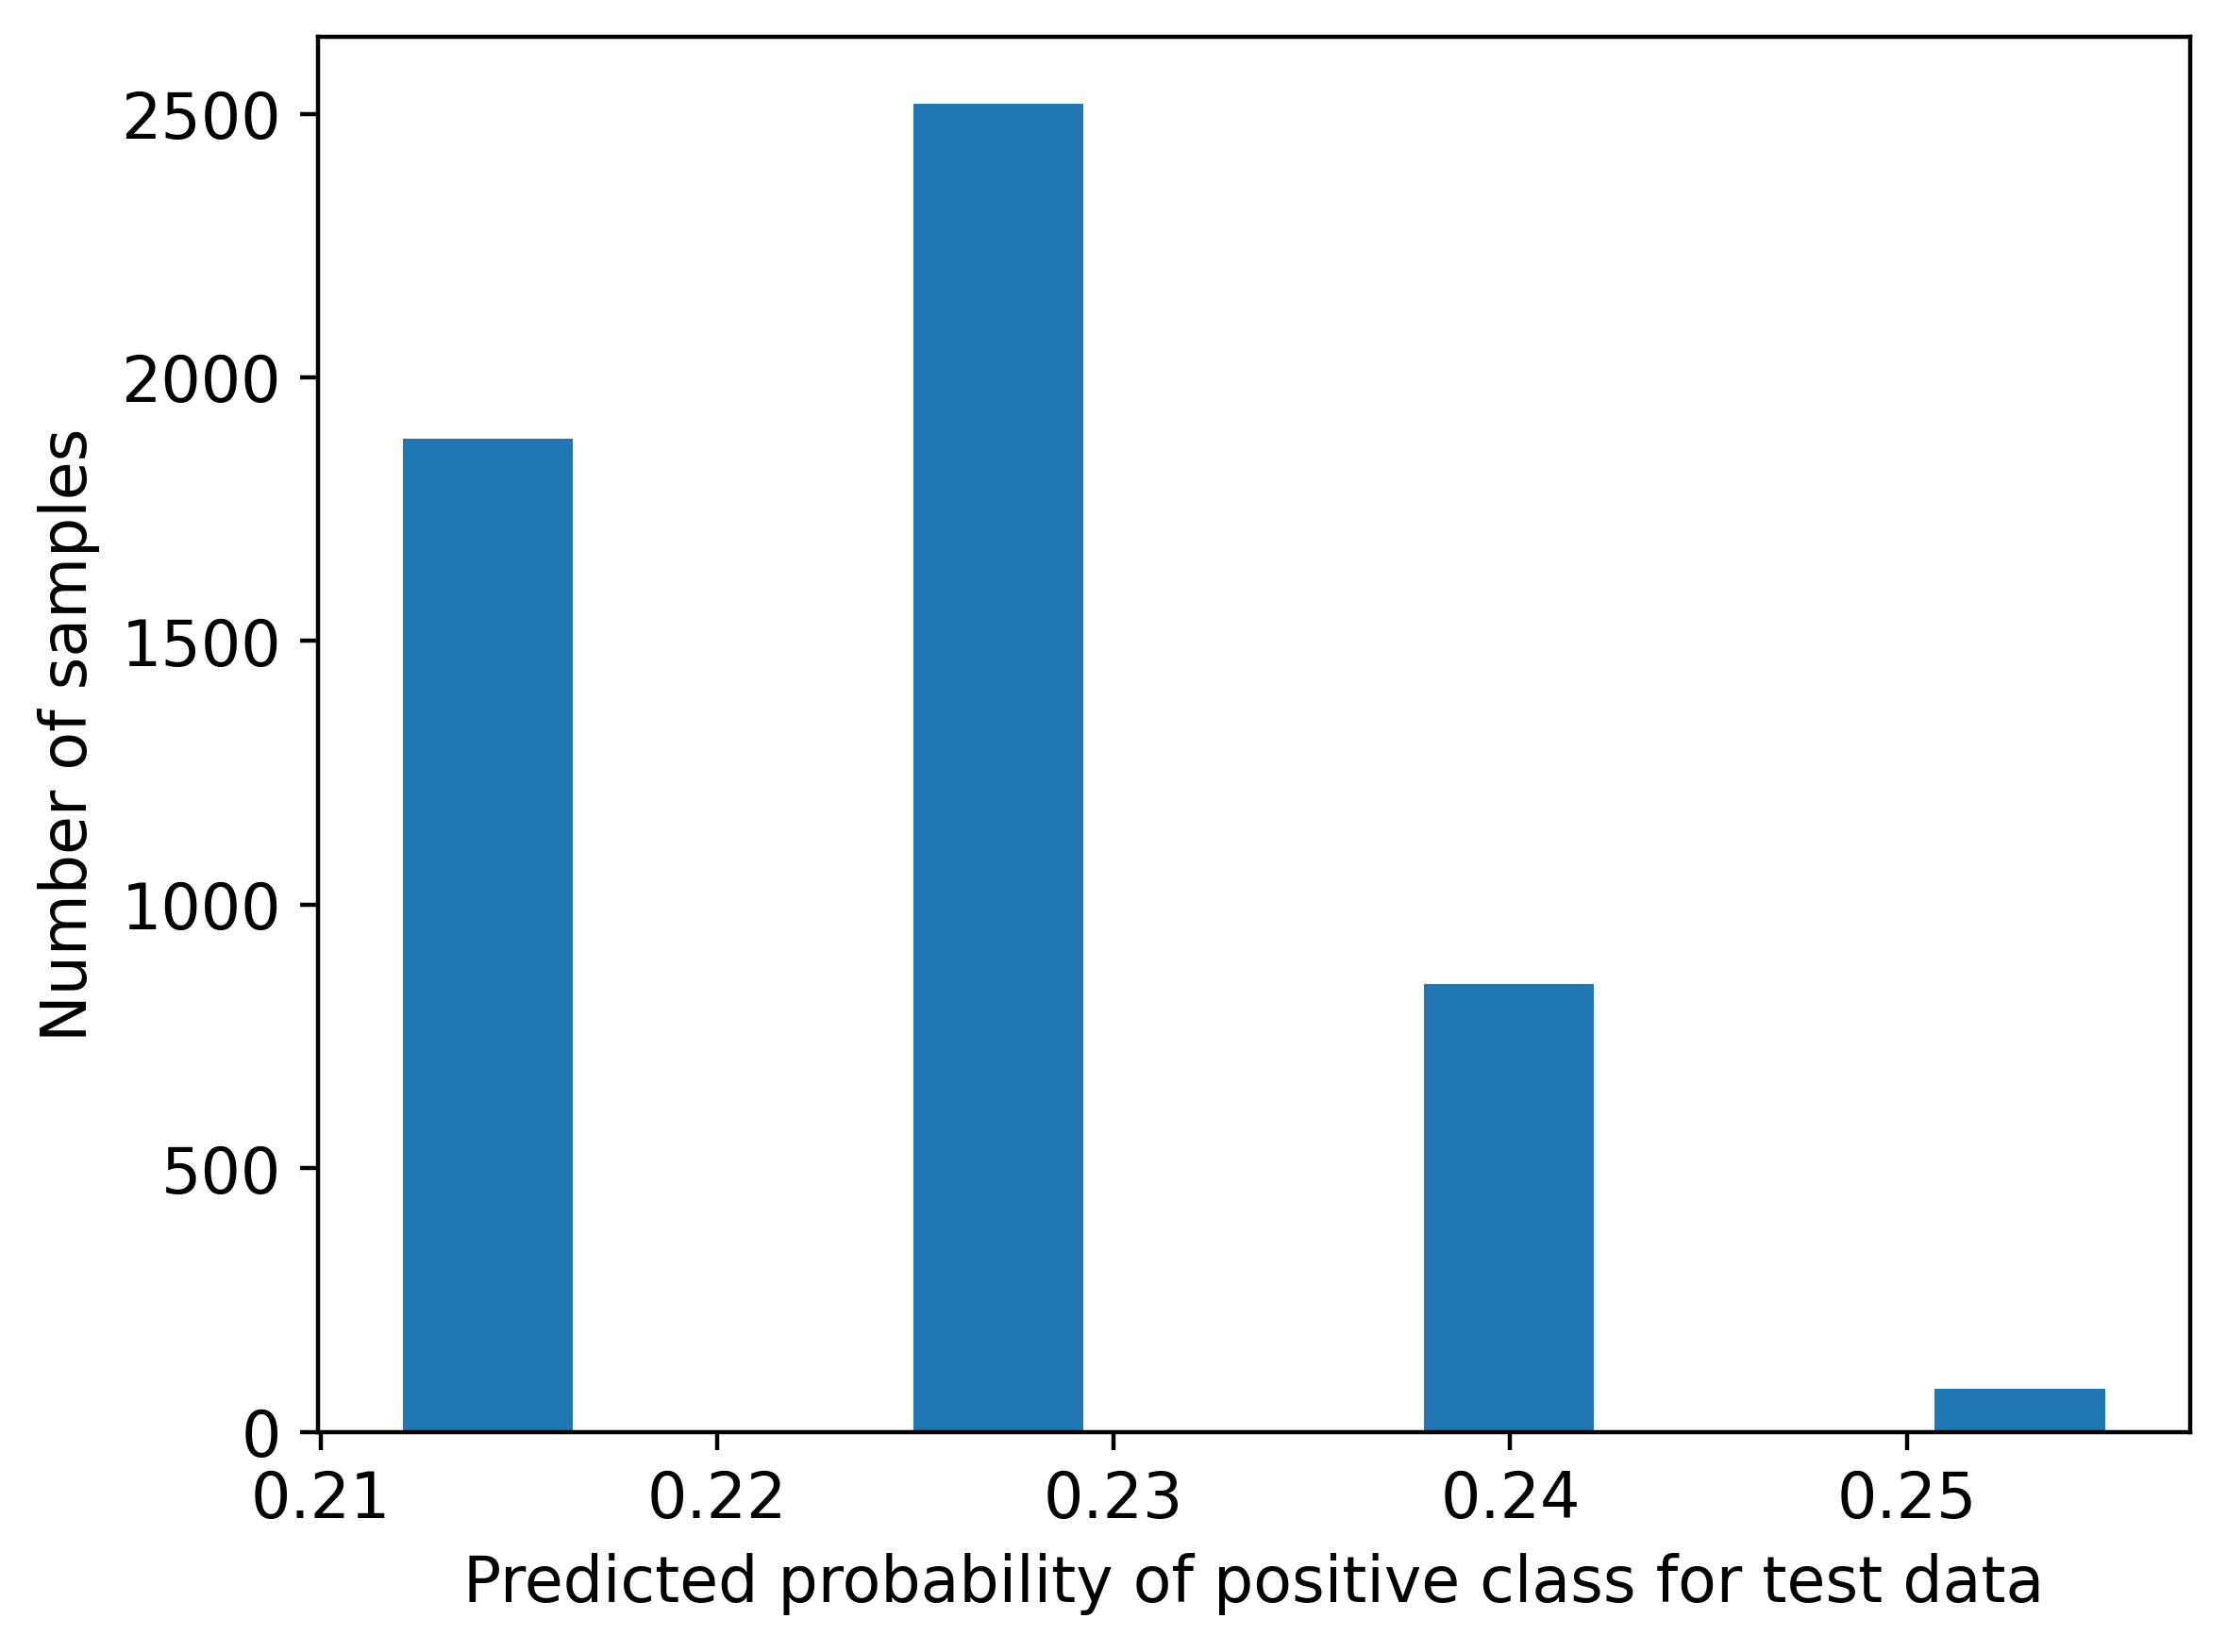

In [233]:
mpl.rcParams['font.size']=12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for test data')
plt.ylabel('Number of samples')

In [234]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

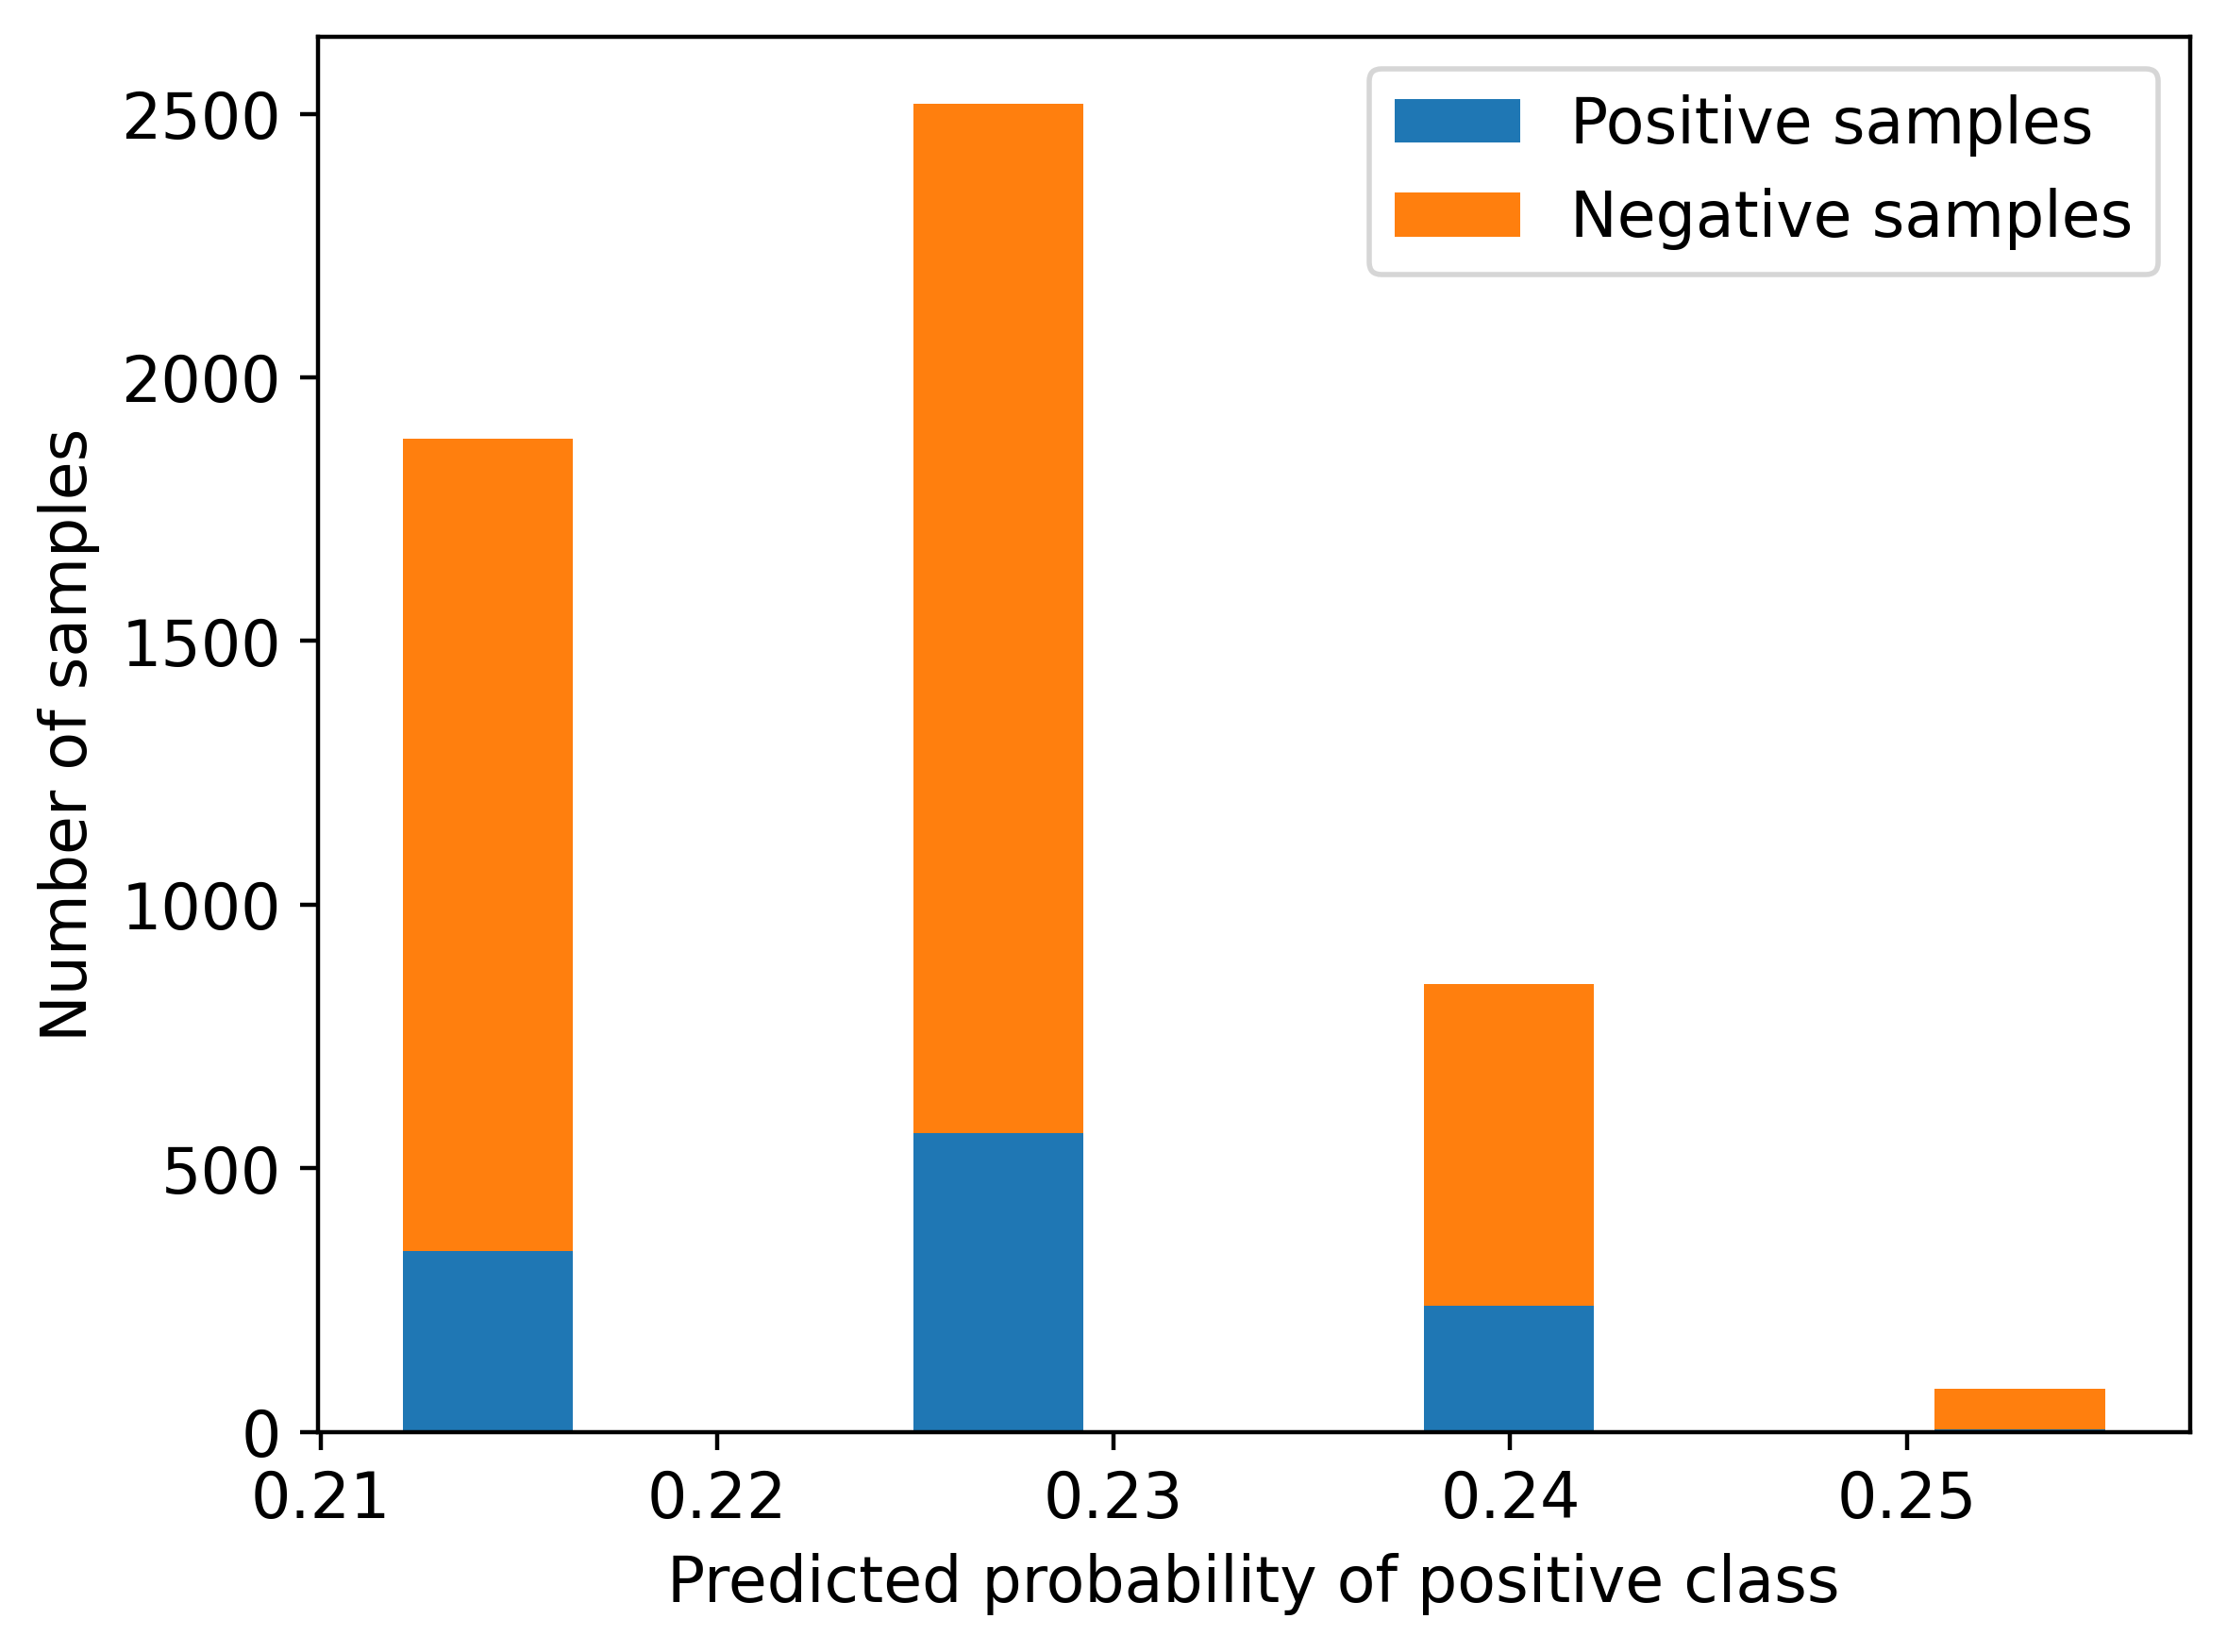

In [235]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

In [236]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

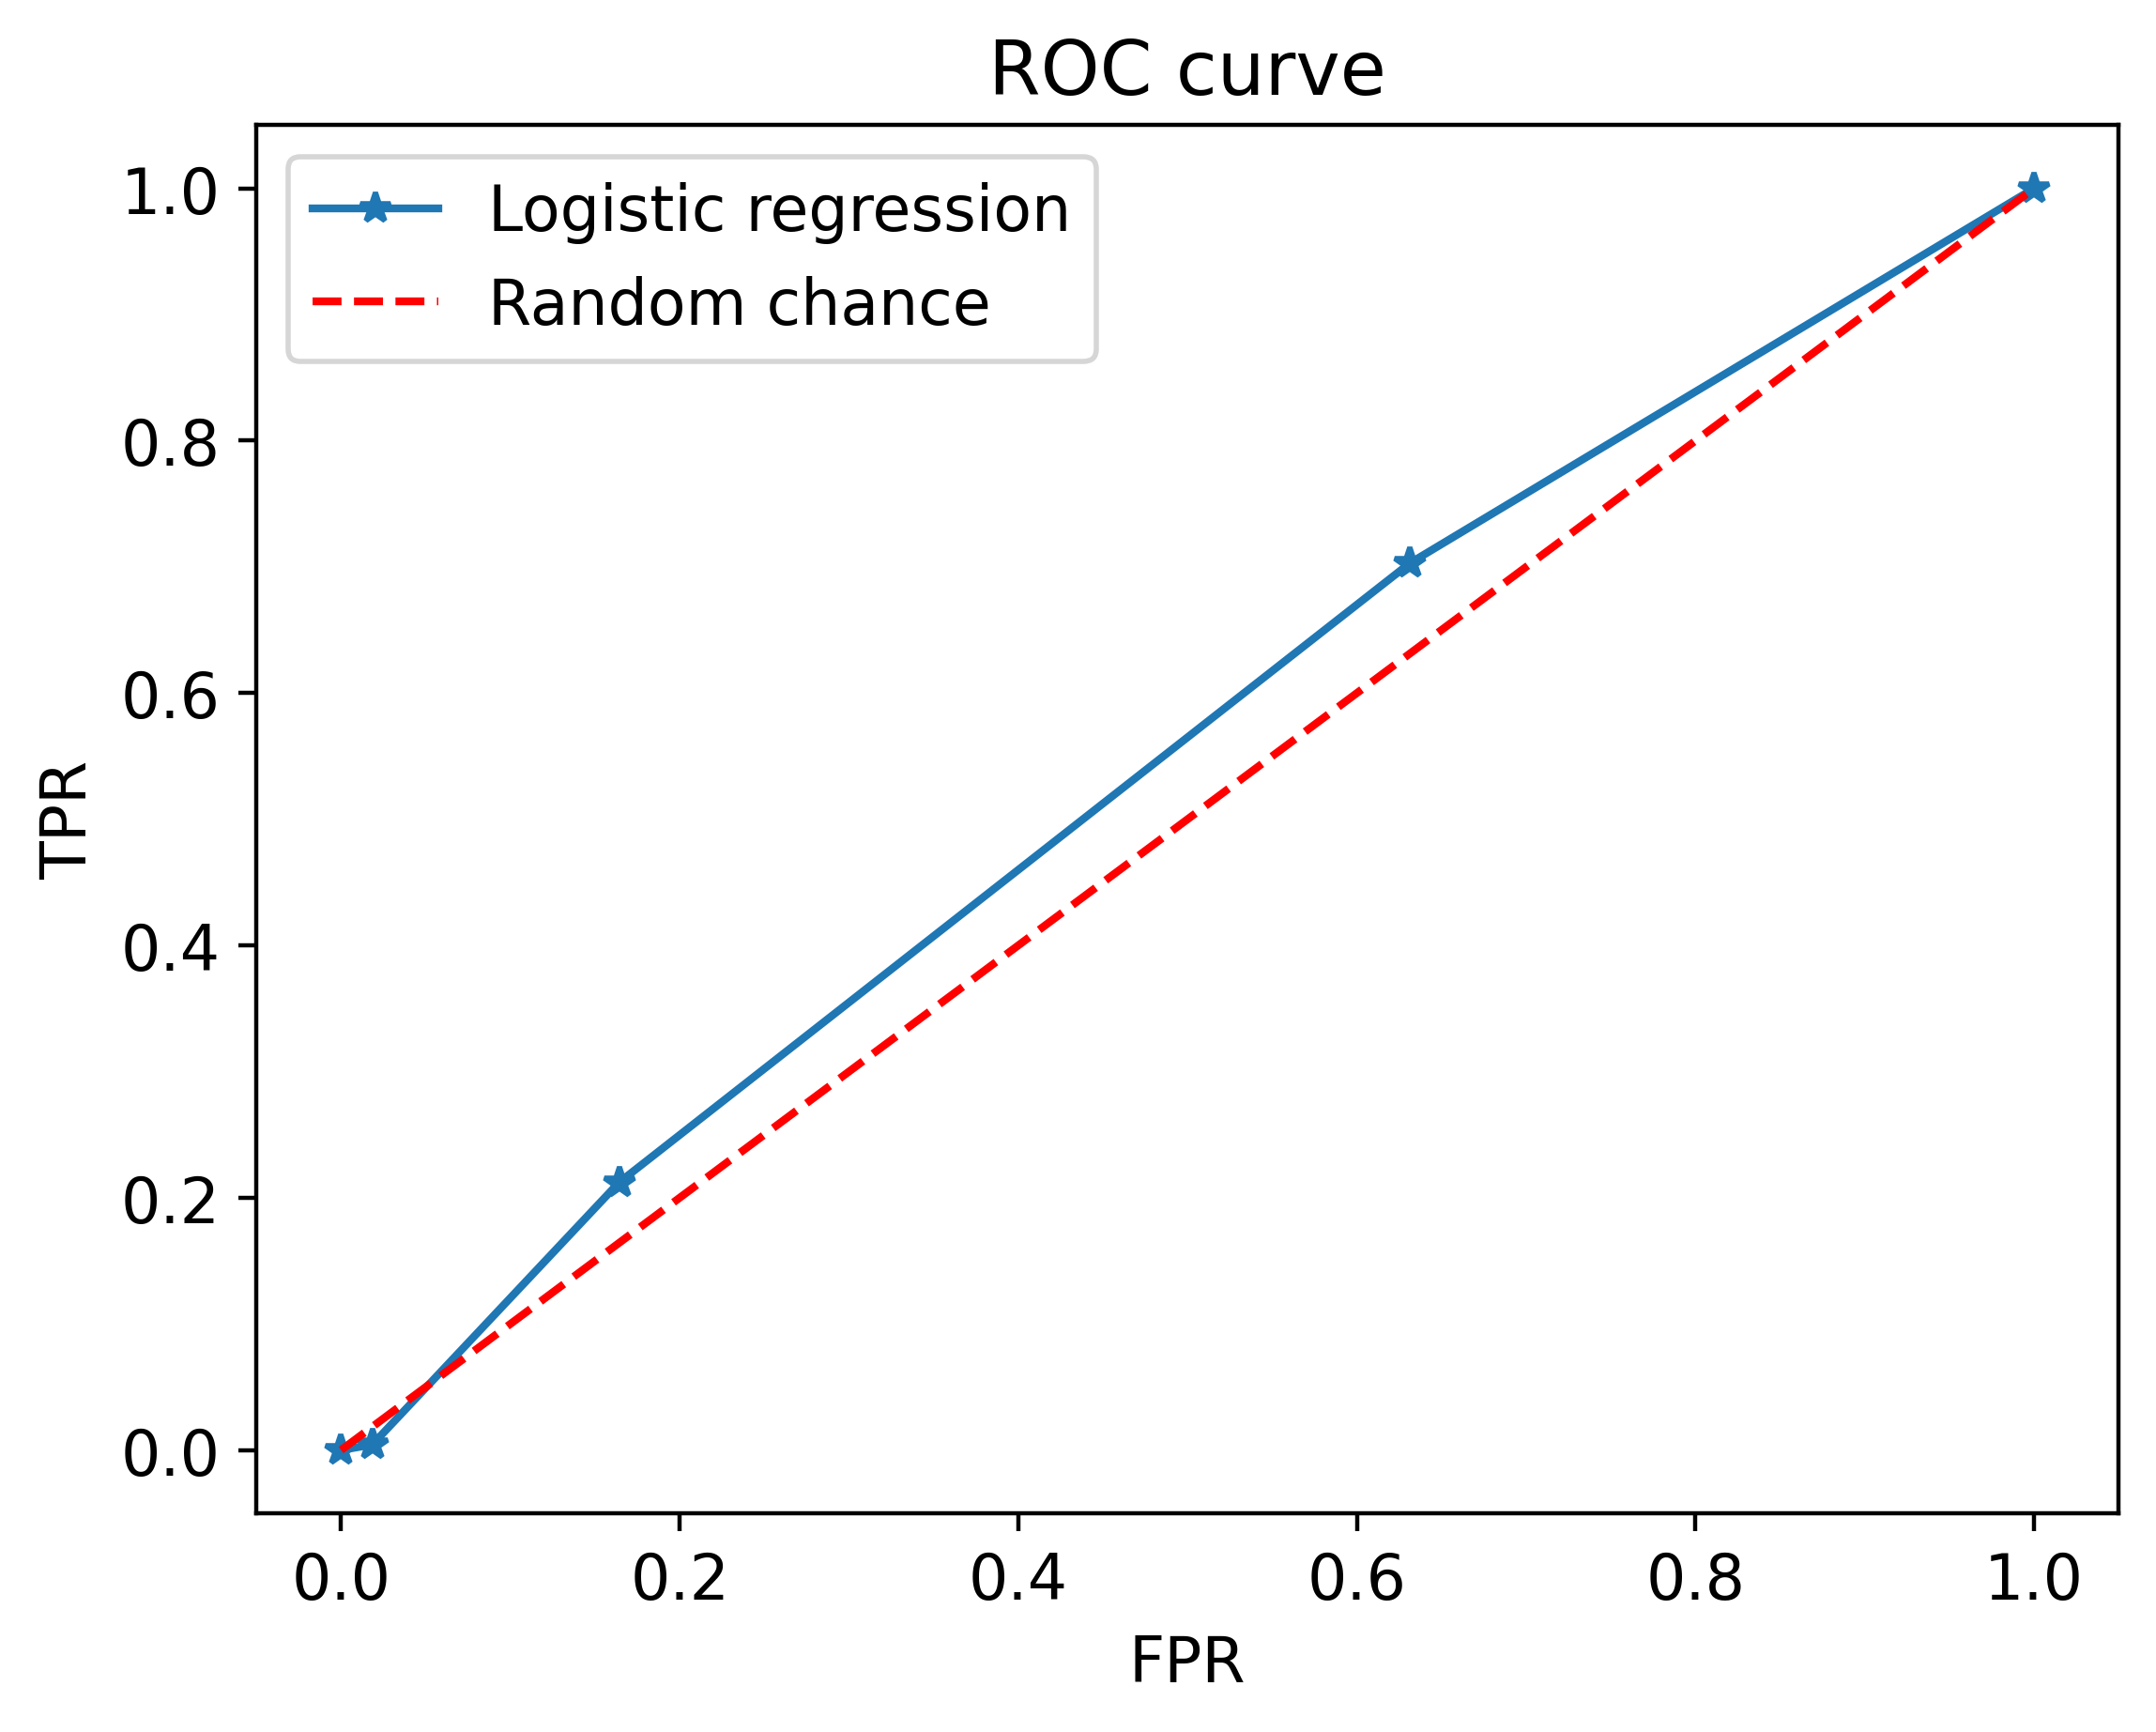

In [237]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [238]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [239]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642